## HOTEL RECOMMENDATION PROJECT

### STEP II : Preparing the data for modeling a hotel recommendation system

Tässä osiossa tutkitaan, muokataan lisää ja valmistellaan aiemmin muokattua dataa suosittelujärjestelmän luontia varten. Tässäkin tutkimusmielessä dataa käydään läpi hiukan laajemmin kun projekti vaatii.

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [201]:
# loading and displaying cleaned dataset
hotels = pd.read_csv('hotel_reviews_cleaned.csv')
hotels.head(5)

,Hotel_Address,Country,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Longitude,Latitude,Total_Words
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,4.915968,52.360576,408
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,4.915968,52.360576,105
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,4.915968,52.360576,63
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,4.915968,52.360576,236
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Netherlands,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,4.915968,52.360576,148


In [202]:
# creating a new dataframe
hotels_review = hotels[['Hotel_Name', 'Country', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Negative_Review', 'Positive_Review', 'Tags']]

------------

### Example for possible sentiment analysis 

In [203]:
# replacing "No Negative" and "No Positive" text with empty strings to ensure cleaner data for analysis
hotels_review['Negative_Review'] = hotels_review['Negative_Review'].replace('No Negative', '')
hotels_review['Positive_Review'] = hotels_review['Positive_Review'].replace('No Positive', '')

# removing extra spaces and special characters
hotels_review['Negative_Review'] = hotels_review['Negative_Review'].str.strip()
hotels_review['Positive_Review'] = hotels_review['Positive_Review'].str.strip()

# converting all text data to lowercase for uniformity
hotels_review['Negative_Review'] = hotels_review['Negative_Review'].str.lower()
hotels_review['Positive_Review'] = hotels_review['Positive_Review'].str.lower()
hotels_review['Tags'] = hotels_review['Tags'].str.lower()

In [204]:
# pip3 install textblob
# performing sentiment analysis with TextBlob
from textblob import TextBlob

# adding sentiment polarity scores for reviews
hotels_review['Positive_Sentiment'] = hotels_review['Positive_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
hotels_review['Negative_Sentiment'] = hotels_review['Negative_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
hotels_review.sample(5)

,Hotel_Name,Country,Average_Score,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Negative_Review,Positive_Review,Tags,Positive_Sentiment,Negative_Sentiment
466182,Hotel Das Tigra,Austria,8.9,30,47,it s in the middle of construction or maybe it...,there are a number of things that i loved abou...,"[' leisure trip ', ' couple ', ' special offer...",0.408333,-0.138889
421355,citizenM Amsterdam,Netherlands,8.6,48,15,had to pay in advance online payment did not w...,staff tried very hard to be helpful and were c...,"[' business trip ', ' solo traveler ', ' doubl...",0.340278,-0.283333
212879,Shaftesbury Premier London Paddington,United Kingdom,7.3,30,14,the location was good but the rooms were very ...,the breakfast were courteous the reception was...,"[' leisure trip ', ' couple ', ' deluxe double...",0.600000,0.458333
301826,Worldhotel Cristoforo Colombo,Italy,8.6,8,45,couldn t fault anything on my stay,upgraded to a beautiful refurbished room best ...,"[' leisure trip ', ' couple ', ' double room '...",0.498333,0.000000
326547,Durrants Hotel,United Kingdom,8.1,0,16,,very well appointed room albeit a bit small lo...,"[' leisure trip ', ' couple ', ' double room '...",0.150000,0.000000


In [205]:
# creating function to convert positive sentiment score to binary using presetted threshold value
def convert_to_binary_pos(row, threshold=0.05):
    if row > threshold:
        return 1
    else:
        return 0

# applying function to convert positive sentiment scores to binary values
hotels_review['Positive_Sentiment'] = hotels_review['Positive_Sentiment'].apply(convert_to_binary_pos)

# creating function to convert negative sentiment score to binary using presetted threshold value
def convert_to_binary_neg(row, threshold=-0.02):
    if row < threshold:
        return 1
    else:
        return 0

# applying function to convert negative sentiment scores to binary values
hotels_review['Negative_Sentiment'] = hotels_review['Negative_Sentiment'].apply(convert_to_binary_neg)
hotels_review.sample(5)

,Hotel_Name,Country,Average_Score,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Negative_Review,Positive_Review,Tags,Positive_Sentiment,Negative_Sentiment
391884,Das Opernring Hotel,Austria,8.9,0,32,,hotel is in excellent location the rooms are v...,"[' business trip ', ' solo traveler ', ' doubl...",1,0
89121,Mercure Paris Gare De Lyon TGV,France,7.9,21,10,i understand patis expensive but felt the pric...,staff most helpful and friendly location perfe...,"[' leisure trip ', ' couple ', ' standard twin...",1,0
55385,COQ Hotel Paris,France,9.0,5,39,everything s perfect,the best experience i ever had the staff are i...,"[' leisure trip ', ' family with young childre...",1,0
369595,Hampshire Hotel Amsterdam American,Netherlands,8.5,3,3,better lighting,comfy beds,"[' leisure trip ', ' family with older childre...",0,0
473647,UNA Hotel Century,Italy,8.6,12,3,an extra pillow i m sure if i d asked,excellent breakfasts,"[' leisure trip ', ' couple ', ' junior suite ...",1,0


In [206]:
# counting the occurrences of different positive and negative sentiment scores in the dataset
positive_sentiment_counts = hotels_review['Positive_Sentiment'].value_counts()
negative_sentiment_counts = hotels_review['Negative_Sentiment'].value_counts()

# displaying the distribution of positive and negative sentiment scores
print(positive_sentiment_counts)
print(negative_sentiment_counts)

Positive_Sentiment
1    397925
0    117287
Name: count, dtype: int64
Negative_Sentiment
0    371804
1    143408
Name: count, dtype: int64


In [207]:
# dropping needless columns
hotels_review = hotels_review.drop(['Positive_Sentiment', 'Negative_Sentiment'], axis=1) 

---------

### Example for possible clustering

In [1]:
# pip3 install scikit-learn
# pip3 install yellowbrick
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# selecting columns of interest
data_for_clustering = hotels_review[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts']]

# normalizing data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# initializing the KMeans model
model = KMeans(random_state=0)

# initializizing the KElbowVisualizer with the KMeans model
visualizer = KElbowVisualizer(model, k=(2,10))

# fitting data to the visualizer
visualizer.fit(data_scaled)

# displaying the elbow plot
visualizer.show()


NameError: name 'hotels_review' is not defined

Kyynärpäämenetelmä suosittelee käyttämään neljää klusteria, koska sen jälkeen lisäklusterit eivät tuo merkittävää hyötyä. Sovitusajan linja kertoo, kuinka kauan klusterianalyysi kestää kullakin klusterien määrällä.

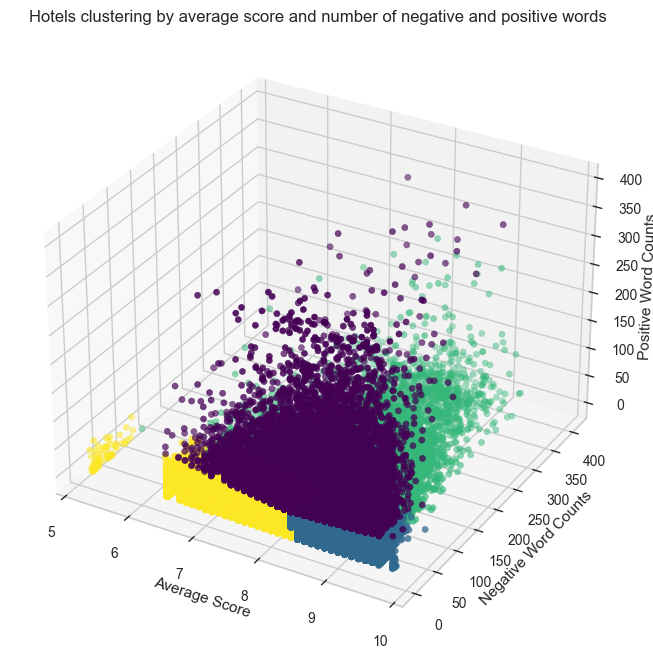

In [209]:
# applying K-Means algorithm
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_scaled)

# adding cluster labels to original data
hotels_review['Cluster'] = kmeans.labels_

# visualizing of results in three-dimensional space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hotels_review['Average_Score'], hotels_review['Review_Total_Negative_Word_Counts'], hotels_review['Review_Total_Positive_Word_Counts'], c=hotels_review['Cluster'], cmap='viridis')
ax.set_title('Hotels clustering by average score and number of negative and positive words')
ax.set_xlabel('Average Score')
ax.set_ylabel('Negative Word Counts')
ax.set_zlabel('Positive Word Counts')
plt.show()


Cluster 1 (Yellow): Hotellit, joiden Average Score on alhaisempi, mutta ei kovin paljon negatiivisia eikä positiivisia sanoja arvosteluissa. Tämä ryhmä todennäköisesti edustaa hotelleja, jotka saattavat kamppailla palveluongelmien tai mukavuuksien puutteen kanssa.

Cluster 2 (Blue): Hotellit, joissa on korkeampi Average Score ja vähän sekä negatiivisia että positiivisia sanoja. Nämä ovat todennäköisesti hyvin arvioituja hotelleja, joissa on tyytyväisiä asiakkaita.

Cluster 3 (Purple): Hotellit, joiden Average Scoret vaihtelevat, mutta negatiivisten sanojen määrä on pienempi kuin  positiivisten. Tämä voi sisältää yhdistelmän eritasoisia hotelleja, joissa vierailla on ristiriitaisia tunteita, mutta joilla on enempi taipumus positiivisiin kokemuksiin ja hyvä maine.

Cluster 4 (Green): Hotellit, joissa Average Scoret vaihtelevat ja joissa on enemmän negatiivisia sanoja kuin positiivisia, saattaa edustaa eritasoisia hotelleja, joissa asiakastyytyväisyys ei ole välttämättä kovin suuri. 

In [210]:
# dropping needless columns
hotels_review = hotels_review.drop(['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts','Cluster'], axis=1) 

-----

In [211]:
# Tags handling

import ast
from collections import Counter

# converting the 'Tags' column to a list of tags using ast.literal_eval
hotels_review['Tags_List'] = hotels_review['Tags'].apply(lambda x: ast.literal_eval(x))

# flattening the list of tags into a single list containing all tags
all_tags = [tag.strip() for tags_list in hotels_review['Tags_List'] for tag in tags_list]

# finding the 20 most common tags
tags_count = Counter(all_tags)
most_common_tags = tags_count.most_common(12)

# extracting just the tag names from the most_common_tags
tags_to_use = [tag.strip().lower() for tag, _ in most_common_tags]

# standardizing tags by converting to lowercase and stripping spaces
hotels_review['Tags_List'] = hotels_review['Tags_List'].apply(lambda tags: [tag.strip().lower() for tag in tags])

# creating binary columns for each of the most common tags
for tag in tags_to_use:
    # ensuring comparison is case-insensitive and considers entire tags only
    hotels_review[tag] = hotels_review['Tags_List'].apply(lambda x: 1 if tag in x else 0)

# droping the original Tags and Tags_List columns
hotels_review = hotels_review.drop(['Tags', 'Tags_List'], axis=1)  
hotels_review.sample(5)

,Hotel_Name,Country,Average_Score,Negative_Review,Positive_Review,leisure trip,submitted from a mobile device,couple,stayed 1 night,stayed 2 nights,solo traveler,stayed 3 nights,business trip,group,family with young children,stayed 4 nights,double room
433474,Hotel Regina,Austria,8.4,no coffee tea making facility room entry was w...,breakfast was good and well organised,1,0,0,0,1,1,0,0,0,0,0,0
73673,Malmaison London,United Kingdom,8.7,all good,lovely room and very friendly staff,1,1,1,0,1,0,0,0,0,0,0,0
401641,Claris Hotel Spa GL,Spain,8.6,,staff were very helpful the hotel looks lovely...,1,1,1,0,1,0,0,0,0,0,0,0
399084,Hotel Casa Fuster G L Monumento,Spain,9.0,the swimming pool should not be called as such...,very helpful and friendly staff we were there ...,1,0,1,0,0,0,1,0,0,0,0,0
322742,Hotel Mercure Wien Westbahnhof,Austria,7.9,staff a bit cold,very nice location to access vienna and the ai...,0,0,0,0,0,0,0,1,1,0,0,0


In [212]:
# creating amenities list based on mentioned in the reviews words and on Google search
amenities = ['spa', 'parking', 'wifi', 'balcony', 'pool', 'breakfast', 'view', 'location', 'service', 'clean', 'comfort', 'kitchen', 'friendly staff', 'air condition', 'pets']

# creating binary columns for amenities
for amenity in amenities:
    hotels_review[amenity] = hotels_review['Positive_Review'].str.contains(amenity) | hotels_review['Negative_Review'].str.contains(amenity)

hotels_review.sample(5)

,Hotel_Name,Country,Average_Score,Negative_Review,Positive_Review,leisure trip,submitted from a mobile device,couple,stayed 1 night,stayed 2 nights,...,breakfast,view,location,service,clean,comfort,kitchen,friendly staff,air condition,pets
111217,Hotel Parc Saint Severin Esprit de France,France,9.1,wireless connection was not good enough,,1,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False
322152,DoubleTree By Hilton London Excel,United Kingdom,8.4,the staff were very rude the hotel wasn t like...,the view was ok,1,1,1,1,0,...,False,True,False,False,False,False,False,False,False,False
438343,Radisson Blu Hotel Amsterdam,Netherlands,8.6,,fast easy check in,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
411178,Duquesa Suites Barcelona,Spain,9.1,,loved the simplicity of the decor perfect loca...,1,1,0,0,0,...,False,False,True,False,False,False,False,False,False,False
399613,Majestic Hotel Spa Barcelona GL,Spain,8.9,nothing,beautiful hotel in the best part of the city l...,1,1,1,0,1,...,False,False,False,False,False,False,False,False,False,False


In [214]:
# aggregating amenities and tags count per hotel
hotel_aggregates = hotels_review.groupby('Hotel_Name').agg({
    'Country': 'first', 
    'Average_Score': 'mean',
    # dynamically aggregate each tag and each amenity
    **{tag: 'sum' for tag in tags_to_use},
    **{amenity: 'sum' for amenity in amenities},
}).reset_index()
hotel_aggregates.head(5)

,Hotel_Name,Country,Average_Score,leisure trip,submitted from a mobile device,couple,stayed 1 night,stayed 2 nights,solo traveler,stayed 3 nights,...,breakfast,view,location,service,clean,comfort,kitchen,friendly staff,air condition,pets
0,11 Cadogan Gardens,United Kingdom,8.7,131,99,90,61,51,37,22,...,27,4,61,31,2,28,0,8,5,0
1,1K Hotel,France,7.7,115,75,70,38,38,49,27,...,27,2,52,14,31,17,1,7,5,1
2,25hours Hotel beim MuseumsQuartier,Austria,8.8,570,383,375,167,211,128,165,...,191,71,245,45,56,81,7,39,5,0
3,41,United Kingdom,9.6,92,65,70,36,36,12,15,...,11,3,18,28,1,11,0,1,0,0
4,45 Park Lane Dorchester Collection,United Kingdom,9.4,19,22,16,10,6,9,8,...,1,1,2,4,2,3,0,0,0,0


In [215]:
# converting counts to binary presence/absence for amenities
for amenity in amenities:
    hotel_aggregates[amenity] = hotel_aggregates[amenity] > 0  

# converting counts to binary presence/absence for tags
for tag in tags_to_use:
    hotel_aggregates[tag] = hotel_aggregates[tag] > 0

hotel_aggregates.sample(5)

,Hotel_Name,Country,Average_Score,leisure trip,submitted from a mobile device,couple,stayed 1 night,stayed 2 nights,solo traveler,stayed 3 nights,...,breakfast,view,location,service,clean,comfort,kitchen,friendly staff,air condition,pets
1070,New Linden Hotel,United Kingdom,7.6,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
234,Col n Hotel Barcelona,Spain,8.9,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
493,Hallmark Hotel London Chigwell Prince Regent,United Kingdom,6.9,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
483,H10 Cubik 4 Sup,Spain,9.3,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
239,Conrad London St James,United Kingdom,9.1,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [216]:
# saving the aggregated DataFrame to a CSV file
hotel_aggregates.to_csv('hotel_aggregates.csv', index=False) 

In [217]:
from sklearn.neighbors import NearestNeighbors

# creating hotel recommendation function
def recommend_hotels_with_scores(country, hotel_name, hotel_aggregates, amenities, tags_to_use, n_neighbors):
    # filtering hotels for the specified country
    country_hotels = hotel_aggregates[hotel_aggregates['Country'] == country]
    # getting the indices of the hotels for later use
    country_indices = country_hotels.index
    # preparing the feature matrix
    X_country = country_hotels[amenities + tags_to_use].values

    # initializing NearestNeighbors with cosine metric
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    # fitting the model to the country-specific data
    knn.fit(X_country)

    # finding the index of the specified hotel within the country's dataframe
    hotel_index = country_hotels[(country_hotels['Hotel_Name'] == hotel_name)].index[0]
    # converting the global index to a local index within the country's subset
    local_index = list(country_indices).index(hotel_index)

    # finding the nearest neighbors of the specified hotel
    distances, local_indices = knn.kneighbors([X_country[local_index]])
    # converting local indices back to global indices
    global_indices = [country_indices[i] for i in local_indices[0]]

    # retrieving recommended hotels' information, including their average scores
    recommended_hotels_info = hotel_aggregates.iloc[global_indices][['Hotel_Name', 'Average_Score']]
    # excluding the original hotel from the recommendations
    recommended_hotels_info = recommended_hotels_info[recommended_hotels_info['Hotel_Name'] != hotel_name]
    # sorting the recommended hotels by their average score in descending order
    recommended_hotels_info = recommended_hotels_info.sort_values(by='Average_Score', ascending=False)

    return recommended_hotels_info

# Example of how to use the function

# here we're recommending hotels similar to 'Duquesa Suites Barcelona' in Spain based on specified features
recommended_hotels_info = recommend_hotels_with_scores("Spain", "Duquesa Suites Barcelona", hotel_aggregates, amenities, tags_to_use, 6)
print("Recommended hotels with average score:\n", recommended_hotels_info)


Recommended hotels with average score:
                      Hotel_Name  Average_Score
1111        Olivia Balmes Hotel            9.3
487      H10 Metropolitan 4 Sup            9.2
582   Hotel Barcelona Universal            8.8
114          Barcelona Princess            8.3
1297       Sunotel Club Central            8.2
